<a href="https://colab.research.google.com/github/Mhtag/time_series_tutorial/blob/main/Timeseries_data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install download


In [ ]:
 import seaborn as sns
 import matplotlib.pyplot as plt
 import pandas as pd
 import numpy as np
 from datetime import datetime
 from download import download
 import matplotlib as mpl

 mpl.rcParams['figure.figsize'] = (15,10)

In [ ]:
path = download('https://archive.ics.uci.edu/ml/machine-learning-databases/00501/PRSA2017_Data_20130301-20170228.zip', 'tmp/aq', kind='zip')

Creating data folder...

file_sizes: 100%|██████████████████████████| 7.96M/7.96M [00:00<00:00, 12.7MB/s]
Extracting zip file...
Successfully downloaded / unzipped to tmp/aq


In [ ]:
!ls -alrt /content/tmp/aq/PRSA_Data_20130301-20170228

total 31780
drwxr-xr-x 3 root root    4096 Oct  1 10:38 ..
-rw-r--r-- 1 root root 2835916 Oct  1 10:38 PRSA_Data_Aotizhongxin_20130301-20170228.csv
-rw-r--r-- 1 root root 2722295 Oct  1 10:39 PRSA_Data_Changping_20130301-20170228.csv
-rw-r--r-- 1 root root 2675856 Oct  1 10:39 PRSA_Data_Dingling_20130301-20170228.csv
-rw-r--r-- 1 root root 2636684 Oct  1 10:39 PRSA_Data_Dongsi_20130301-20170228.csv
-rw-r--r-- 1 root root 2695860 Oct  1 10:39 PRSA_Data_Guanyuan_20130301-20170228.csv
-rw-r--r-- 1 root root 2654625 Oct  1 10:39 PRSA_Data_Gucheng_20130301-20170228.csv
-rw-r--r-- 1 root root 2641027 Oct  1 10:39 PRSA_Data_Huairou_20130301-20170228.csv
-rw-r--r-- 1 root root 2839705 Oct  1 10:39 PRSA_Data_Nongzhanguan_20130301-20170228.csv
-rw-r--r-- 1 root root 2620654 Oct  1 10:39 PRSA_Data_Shunyi_20130301-20170228.csv
-rw-r--r-- 1 root root 2655061 Oct  1 10:39 PRSA_Data_Tiantan_20130301-20170228.csv
-rw-r--r-- 1 root root 2659544 Oct  1 10:39 PRSA_Data_Wanliu_20130301-20170228.csv
drwxr-

In [ ]:
df = pd.read_csv('/content/tmp/aq/PRSA_Data_20130301-20170228/PRSA_Data_Dingling_20130301-20170228.csv', encoding='ISO-8859-1')

In [ ]:
df

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,3.0,NaN,200.0,82.0,-2.3,1020.8,-19.7,0.0,E,0.5,Dingling
1,2,2013,3,1,1,7.0,7.0,3.0,NaN,200.0,80.0,-2.5,1021.3,-19.0,0.0,ENE,0.7,Dingling
2,3,2013,3,1,2,5.0,5.0,3.0,2.0,200.0,79.0,-3.0,1021.3,-19.9,0.0,ENE,0.2,Dingling
3,4,2013,3,1,3,6.0,6.0,3.0,NaN,200.0,79.0,-3.6,1021.8,-19.1,0.0,NNE,1.0,Dingling
4,5,2013,3,1,4,5.0,5.0,3.0,NaN,200.0,81.0,-3.5,1022.3,-19.4,0.0,N,2.1,Dingling
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35059,35060,2017,2,28,19,11.0,11.0,2.0,2.0,200.0,99.0,11.7,1008.9,-13.3,0.0,NNE,1.3,Dingling
35060,35061,2017,2,28,20,13.0,13.0,2.0,2.0,200.0,101.0,10.9,1009.0,-14.0,0.0,N,2.1,Dingling
35061,35062,2017,2,28,21,9.0,14.0,2.0,2.0,200.0,102.0,9.5,1009.4,-13.0,0.0,N,1.5,Dingling
35062,35063,2017,2,28,22,10.0,12.0,2.0,2.0,200.0,97.0,7.8,1009.6,-12.6,0.0,NW,1.4,Dingling


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34285 non-null  float64
 6   PM10     34408 non-null  float64
 7   SO2      34334 non-null  float64
 8   NO2      33830 non-null  float64
 9   CO       33052 non-null  float64
 10  O3       33850 non-null  float64
 11  TEMP     35011 non-null  float64
 12  PRES     35014 non-null  float64
 13  DEWP     35011 non-null  float64
 14  RAIN     35013 non-null  float64
 15  wd       34924 non-null  object 
 16  WSPM     35021 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


In [ ]:
def convert_to_date(x):
  return datetime.strptime(x, '%Y %m %d %H')

In [ ]:
aq_df = pd.read_csv('/content/tmp/aq/PRSA_Data_20130301-20170228/PRSA_Data_Dingling_20130301-20170228.csv', parse_dates=[['year', 'month', 'day', 'hour']],date_parser=convert_to_date, keep_date_col=True) 

In [ ]:
aq_df.head()

,year_month_day_hour,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,2013-03-01 00:00:00,1,2013,3,1,0,4.0,4.0,3.0,NaN,200.0,82.0,-2.3,1020.8,-19.7,0.0,E,0.5,Dingling
1,2013-03-01 01:00:00,2,2013,3,1,1,7.0,7.0,3.0,NaN,200.0,80.0,-2.5,1021.3,-19.0,0.0,ENE,0.7,Dingling
2,2013-03-01 02:00:00,3,2013,3,1,2,5.0,5.0,3.0,2.0,200.0,79.0,-3.0,1021.3,-19.9,0.0,ENE,0.2,Dingling
3,2013-03-01 03:00:00,4,2013,3,1,3,6.0,6.0,3.0,NaN,200.0,79.0,-3.6,1021.8,-19.1,0.0,NNE,1.0,Dingling
4,2013-03-01 04:00:00,5,2013,3,1,4,5.0,5.0,3.0,NaN,200.0,81.0,-3.5,1022.3,-19.4,0.0,N,2.1,Dingling


In [ ]:
aq_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   year_month_day_hour  35064 non-null  datetime64[ns]
 1   No                   35064 non-null  int64         
 2   year                 35064 non-null  object        
 3   month                35064 non-null  object        
 4   day                  35064 non-null  object        
 5   hour                 35064 non-null  object        
 6   PM2.5                34285 non-null  float64       
 7   PM10                 34408 non-null  float64       
 8   SO2                  34334 non-null  float64       
 9   NO2                  33830 non-null  float64       
 10  CO                   33052 non-null  float64       
 11  O3                   33850 non-null  float64       
 12  TEMP                 35011 non-null  float64       
 13  PRES                 35014 non-

In [ ]:
	# converting year, month, day and hour column from object to integer
for col in ['year',	'month',	'day',	'hour']:
  aq_df[col] = pd.to_numeric(aq_df[col])

In [ ]:
print('Shape :', aq_df.shape)
print('features :', aq_df.columns.to_list())
print('\nMissing Values :', aq_df.isnull().any())
print('\nUnique Values \n:', aq_df.nunique())

Shape : (35064, 19)
features : ['year_month_day_hour', 'No', 'year', 'month', 'day', 'hour', 'PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'wd', 'WSPM', 'station']

Missing Values : year_month_day_hour    False
No                     False
year                   False
month                  False
day                    False
hour                   False
PM2.5                   True
PM10                    True
SO2                     True
NO2                     True
CO                      True
O3                      True
TEMP                    True
PRES                    True
DEWP                    True
RAIN                    True
wd                      True
WSPM                    True
station                False
dtype: bool

Unique Values 
: year_month_day_hour    35064
No                     35064
year                       5
month                     12
day                       31
hour                      24
PM2.5                    486
PM10 

In [ ]:
aq_df.describe()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,34285.000000,34408.000000,34334.000000,33830.000000,33052.000000,33850.000000,35011.000000,35014.000000,35011.000000,35013.000000,35021.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,65.989497,83.739723,11.749650,27.585467,904.896073,68.548371,13.686111,1007.760278,1.505495,0.060366,1.853836
std,10122.249256,1.177213,3.448752,8.800218,6.922285,72.267723,79.541685,15.519259,26.383882,903.306220,53.764424,11.365313,10.225664,13.822099,0.752899,1.309808
min,1.000000,2013.000000,1.000000,1.000000,0.000000,3.000000,2.000000,0.285600,1.026500,100.000000,0.214200,-16.600000,982.400000,-35.100000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,14.000000,26.000000,2.000000,9.000000,300.000000,31.000000,3.400000,999.300000,-10.200000,0.000000,1.000000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,41.000000,60.000000,5.000000,19.000000,600.000000,61.000000,14.700000,1007.400000,1.800000,0.000000,1.500000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,93.000000,117.000000,15.000000,38.000000,1200.000000,90.000000,23.300000,1016.000000,14.200000,0.000000,2.300000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,881.000000,905.000000,156.000000,205.000000,10000.000000,500.000000,41.400000,1036.500000,27.200000,52.100000,10.000000


In [ ]:
aq_df1 = aq_df.copy()

## setting our year_month_day_hour column as index

In [ ]:

aq_df1 =aq_df1.set_index('year_month_day_hour')

In [ ]:
aq_df1.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
year_month_day_hour,,,,,,,,,,,,,,,,,,
2013-03-01 00:00:00,1,2013,3,1,0,4.0,4.0,3.0,NaN,200.0,82.0,-2.3,1020.8,-19.7,0.0,E,0.5,Dingling
2013-03-01 01:00:00,2,2013,3,1,1,7.0,7.0,3.0,NaN,200.0,80.0,-2.5,1021.3,-19.0,0.0,ENE,0.7,Dingling
2013-03-01 02:00:00,3,2013,3,1,2,5.0,5.0,3.0,2.0,200.0,79.0,-3.0,1021.3,-19.9,0.0,ENE,0.2,Dingling
2013-03-01 03:00:00,4,2013,3,1,3,6.0,6.0,3.0,NaN,200.0,79.0,-3.6,1021.8,-19.1,0.0,NNE,1.0,Dingling
2013-03-01 04:00:00,5,2013,3,1,4,5.0,5.0,3.0,NaN,200.0,81.0,-3.5,1022.3,-19.4,0.0,N,2.1,Dingling


In [ ]:
aq_df1.loc['2013-03-01':'2013-04-01']

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
year_month_day_hour,,,,,,,,,,,,,,,,,,
2013-03-01 00:00:00,1,2013,3,1,0,4.0,4.0,3.0,NaN,200.0,82.0,-2.3,1020.8,-19.7,0.0,E,0.5,Dingling
2013-03-01 01:00:00,2,2013,3,1,1,7.0,7.0,3.0,NaN,200.0,80.0,-2.5,1021.3,-19.0,0.0,ENE,0.7,Dingling
2013-03-01 02:00:00,3,2013,3,1,2,5.0,5.0,3.0,2.0,200.0,79.0,-3.0,1021.3,-19.9,0.0,ENE,0.2,Dingling
2013-03-01 03:00:00,4,2013,3,1,3,6.0,6.0,3.0,NaN,200.0,79.0,-3.6,1021.8,-19.1,0.0,NNE,1.0,Dingling
2013-03-01 04:00:00,5,2013,3,1,4,5.0,5.0,3.0,NaN,200.0,81.0,-3.5,1022.3,-19.4,0.0,N,2.1,Dingling
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2013-04-01 19:00:00,764,2013,4,1,19,14.0,33.0,3.0,3.0,200.0,98.0,11.1,1012.8,-12.4,0.0,NE,2.1,Dingling
2013-04-01 20:00:00,765,2013,4,1,20,8.0,34.0,3.0,2.0,200.0,95.0,10.0,1013.8,-16.3,0.0,NE,1.7,Dingling
2013-04-01 21:00:00,766,2013,4,1,21,12.0,20.0,3.0,NaN,200.0,97.0,9.1,1014.4,-17.9,0.0,ENE,2.1,Dingling


In [ ]:
aq_df1.loc['2013':'2015']

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
year_month_day_hour,,,,,,,,,,,,,,,,,,
2013-03-01 00:00:00,1,2013,3,1,0,4.0,4.0,3.0,NaN,200.0,82.0,-2.3,1020.8,-19.7,0.0,E,0.5,Dingling
2013-03-01 01:00:00,2,2013,3,1,1,7.0,7.0,3.0,NaN,200.0,80.0,-2.5,1021.3,-19.0,0.0,ENE,0.7,Dingling
2013-03-01 02:00:00,3,2013,3,1,2,5.0,5.0,3.0,2.0,200.0,79.0,-3.0,1021.3,-19.9,0.0,ENE,0.2,Dingling
2013-03-01 03:00:00,4,2013,3,1,3,6.0,6.0,3.0,NaN,200.0,79.0,-3.6,1021.8,-19.1,0.0,NNE,1.0,Dingling
2013-03-01 04:00:00,5,2013,3,1,4,5.0,5.0,3.0,NaN,200.0,81.0,-3.5,1022.3,-19.4,0.0,N,2.1,Dingling
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-12-31 19:00:00,24860,2015,12,31,19,85.0,95.0,12.0,73.0,1200.0,2.0,-0.6,1021.0,-9.5,0.0,NE,0.6,Dingling
2015-12-31 20:00:00,24861,2015,12,31,20,NaN,109.0,32.0,79.0,2900.0,2.0,-1.8,1021.2,-9.9,0.0,NW,1.1,Dingling
2015-12-31 21:00:00,24862,2015,12,31,21,80.0,100.0,35.0,81.0,3200.0,2.0,-1.6,1020.8,-9.7,0.0,NE,0.9,Dingling


In [ ]:
pm_data = aq_df1['PM2.5']
pm_data.head()

year_month_day_hour
2013-03-01 00:00:00    4.0
2013-03-01 01:00:00    7.0
2013-03-01 02:00:00    5.0
2013-03-01 03:00:00    6.0
2013-03-01 04:00:00    5.0
Name: PM2.5, dtype: float64

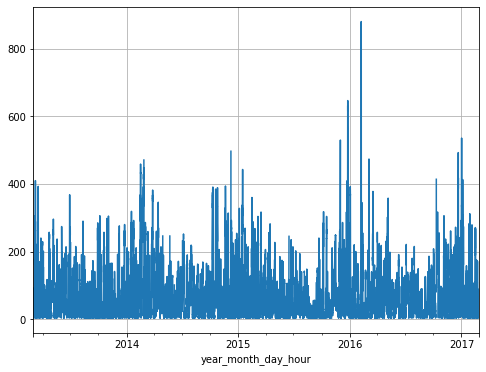

In [ ]:
pm_data.plot(grid=True)

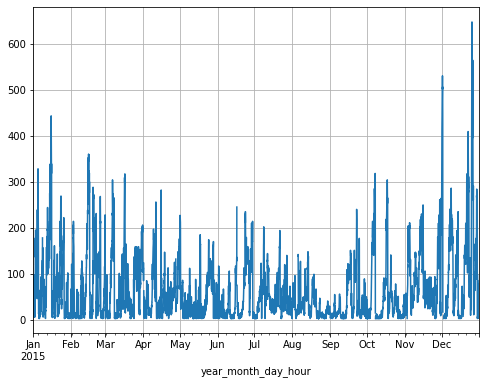

In [ ]:
# ploting for 2015
pm_data['2015'].plot(grid=True)

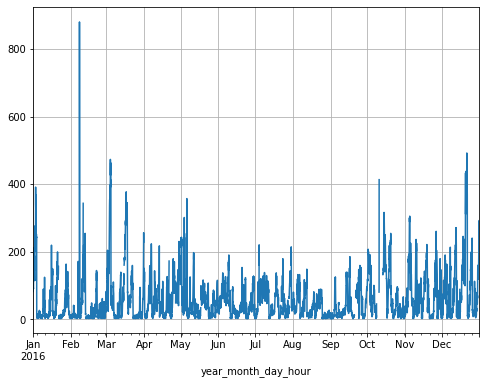

In [ ]:
# ploting from 2016
pm_data['2016'].plot(grid=True)

In [ ]:
import plotly.express as px
fig = px.line(aq_df, x='year_month_day_hour', y='PM2.5', title='PM2.5 with slider')

fig.update_xaxes(rangeslider_visible=True)
fig.show()


In [ ]:
fig = px.line(aq_df, x='year_month_day_hour', y='PM2.5', title='PM2.5 with slider')

fig.update_xaxes(
    rangeslider_visible=True,
    rangeselector=dict(
        buttons=list([
                dict(count=1, label='1y', step='year', stepmode='backward'),
                dict(count=2, label='2y', step='year', stepmode='backward'),
                dict(count=3, label='3y', step='year', stepmode='backward'),
                dict(step='all')
              ])
           )
)
fig.show()

In [ ]:
aq_df1['2014':'2016'][['month','PM2.5']].groupby('month').describe()

PM2.5                                                       
        count       mean         std  min   25%   50%     75%    max
month                                                               
1      2173.0  70.285274   75.913587  3.0  12.0  38.0  113.00  443.0
2      1978.0  86.389282  105.603069  3.0  10.0  33.0  132.00  881.0
3      2212.0  80.193852   87.889440  3.0  13.0  47.0  123.25  474.0
4      2105.0  67.963325   56.430235  3.0  25.0  54.0   95.00  346.0
5      2188.0  47.994378   44.843130  3.0  16.0  35.0   67.00  358.0
6      2119.0  46.655403   43.877349  3.0  13.0  31.0   69.00  245.0
7      2205.0  61.671474   50.926149  3.0  21.0  48.0   91.00  252.0
8      2206.0  41.364869   37.279312  3.0  13.0  29.0   60.00  217.0
9      2074.0  45.356123   43.235331  3.0  11.0  27.0   78.00  240.0
10     2081.0  82.586257   92.234361  3.0  13.0  43.0  124.00  414.0
11     2141.0  77.500140   71.720648  3.0  20.0  56.0  112.00  394.0
12     2186.0  87.990851  104.677021  3.0  11.0  48.5  135.00  647.0

In [ ]:
aq_df1['2014':'2016'][['month','PM2.5','TEMP']].groupby('month').agg({'PM2.5':'max','TEMP':['min','max','mean']})

PM2.5  TEMP                 
         max   min   max       mean
month                              
1      443.0 -16.6  12.4  -1.594616
2      881.0 -10.9  14.0   0.861810
3      474.0  -6.4  26.0   9.229352
4      346.0   1.3  32.0  16.445741
5      358.0   7.0  41.4  21.493414
6      245.0  15.1  38.1  25.038287
7      252.0  16.8  39.2  27.239471
8      217.0  16.6  36.3  26.593414
9      240.0   7.8  34.5  20.857568
10     414.0  -1.4  28.1  13.624937
11     394.0 -10.3  20.8   4.564444
12     647.0  -9.7  11.6  -0.146505

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fa94fd743d0>,
      dtype=object)

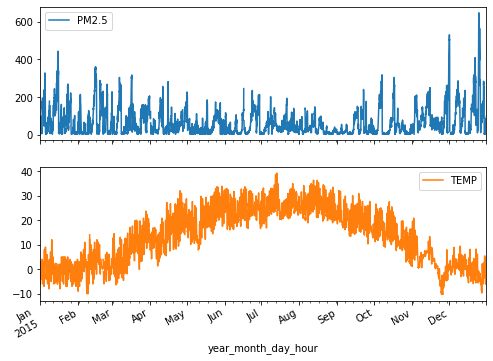

In [ ]:
aq_df_2015 = aq_df1['2015']
aq_df_2015 = aq_df_2015[['PM2.5','TEMP']]
aq_df_2015.plot(subplots=True)

## we see that as the temp is increasing PM2.5 is decreasing.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa94f787d90>,
      dtype=object)

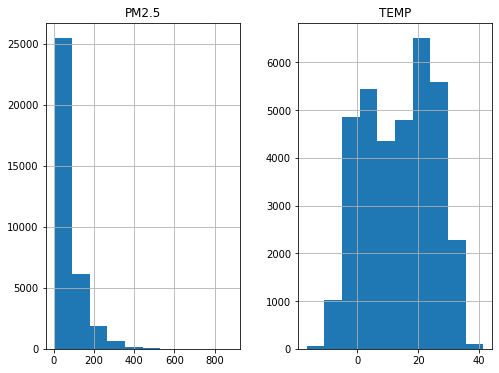

In [ ]:
aq_df1[['PM2.5','TEMP']].hist()

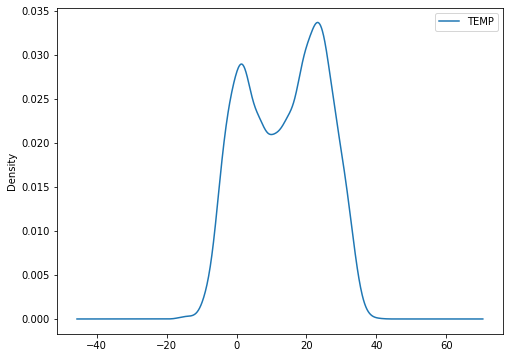

In [ ]:
aq_df1[['TEMP']].plot(kind='density')

# Lag Plot


1.   its a Scatter plot
2.   X axis is the current time and y axis is the lag time.
3.   By default lag period is one



In [ ]:
from pandas.plotting import lag_plot

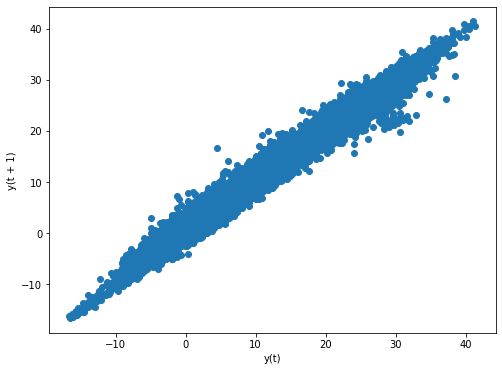

In [ ]:
lag_plot(aq_df1['TEMP'],lag=1)            # ploting temperature x axis is current time and my y axis is one hour prior
                                          # lag is the how much time prior 

## We see that their is positive correlation of temp of current time period and one hour priop temperature

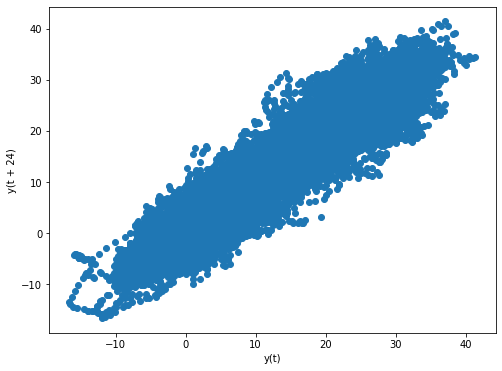

In [ ]:
lag_plot(aq_df1['TEMP'],lag=24)  # with 24 hours lag

## we see that current temperature has very positive correlation with temperature one day prior

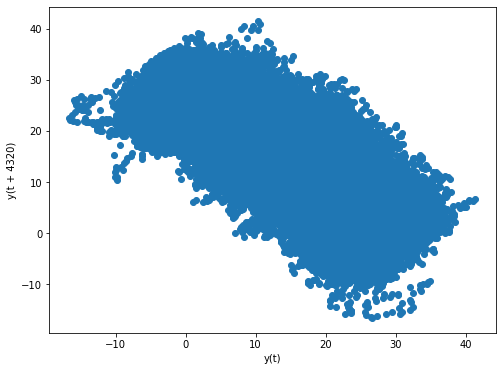

In [ ]:
lag_plot(aq_df1['TEMP'],lag=24*180)    # for 6 months

## we see that current temperature has a very negative correlation with the temperature of six months prior temperature

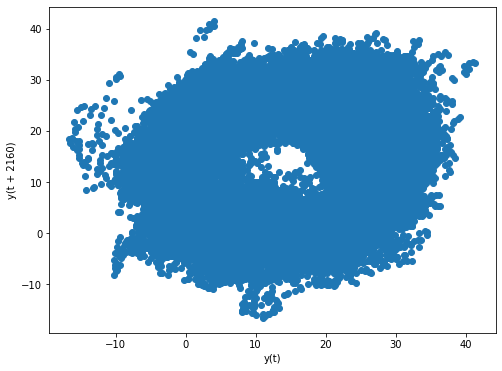

In [ ]:
lag_plot(aq_df1['TEMP'],lag=24*90)

# Multivariate Analysis

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fa951cf86d0>,
      dtype=object)

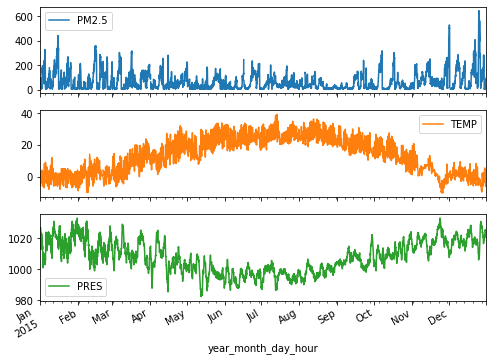

In [ ]:
aq_df_2015 = aq_df1['2015']
aq_df_2015 = aq_df_2015[['PM2.5','TEMP','PRES']]
aq_df_2015.plot(subplots=True)

In [ ]:
## we see that presure and temperature has negative correlation
# presure and PM2.5 has a positive correlation

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fa944522c10>,
      dtype=object)

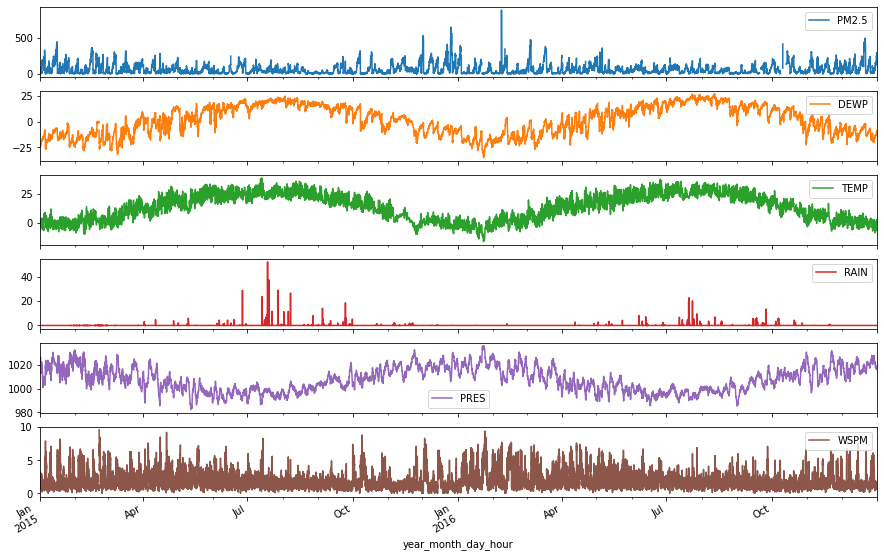

In [ ]:
aq_df1['2015':'2016'][['PM2.5','DEWP','TEMP','RAIN',"PRES",'WSPM']].plot(subplots=True)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fa94348e890>,
      dtype=object)

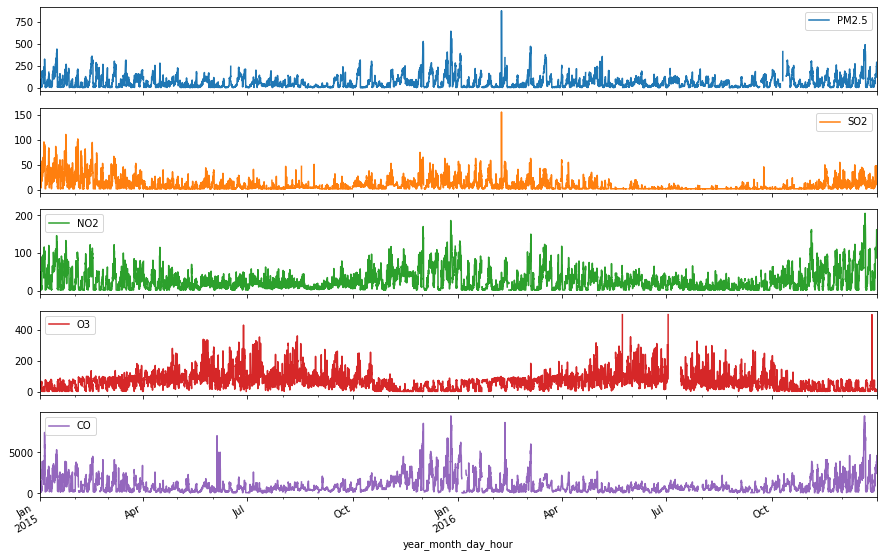

In [ ]:
aq_df1['2015':'2016'][['PM2.5','SO2','NO2','O3','CO']].plot(subplots=True)

In [ ]:
aq_corr = aq_df1[['PM2.5','DEWP','TEMP','RAIN',"PRES",'WSPM']].corr()
aq_corr

,PM2.5,DEWP,TEMP,RAIN,PRES,WSPM
PM2.5,1.000000,0.134558,-0.089939,-0.009221,-0.008005,-0.255714
DEWP,0.134558,1.000000,0.823684,0.090351,-0.765659,-0.313721
TEMP,-0.089939,0.823684,1.000000,0.035177,-0.837844,-0.002456
RAIN,-0.009221,0.090351,0.035177,1.000000,-0.058766,0.007476
PRES,-0.008005,-0.765659,-0.837844,-0.058766,1.000000,0.086551
WSPM,-0.255714,-0.313721,-0.002456,0.007476,0.086551,1.000000


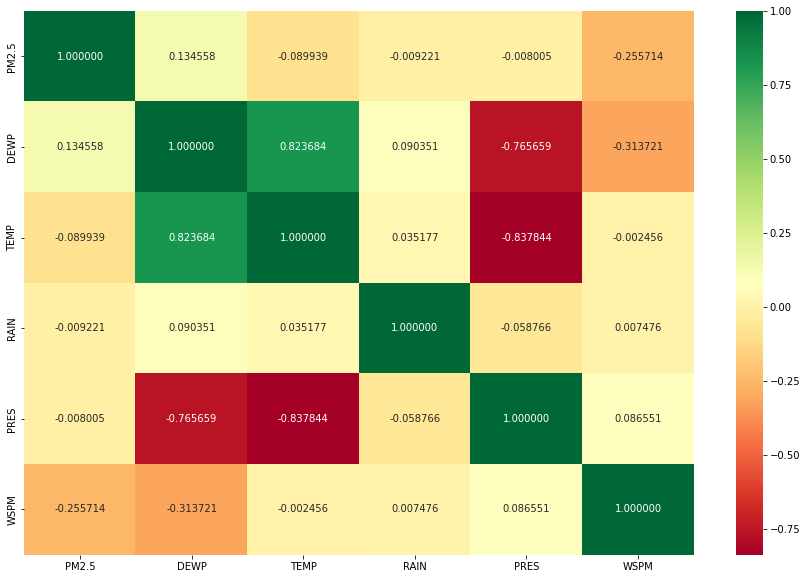

In [ ]:
sns.heatmap(aq_corr,annot=True, fmt='2f',cmap='RdYlGn')

# AutoCorrelation Plot

> It measures the linear relationship between the laged value of time series.






In [ ]:
from pandas.plotting import autocorrelation_plot

In [ ]:
aq_df_na = aq_df1.dropna()

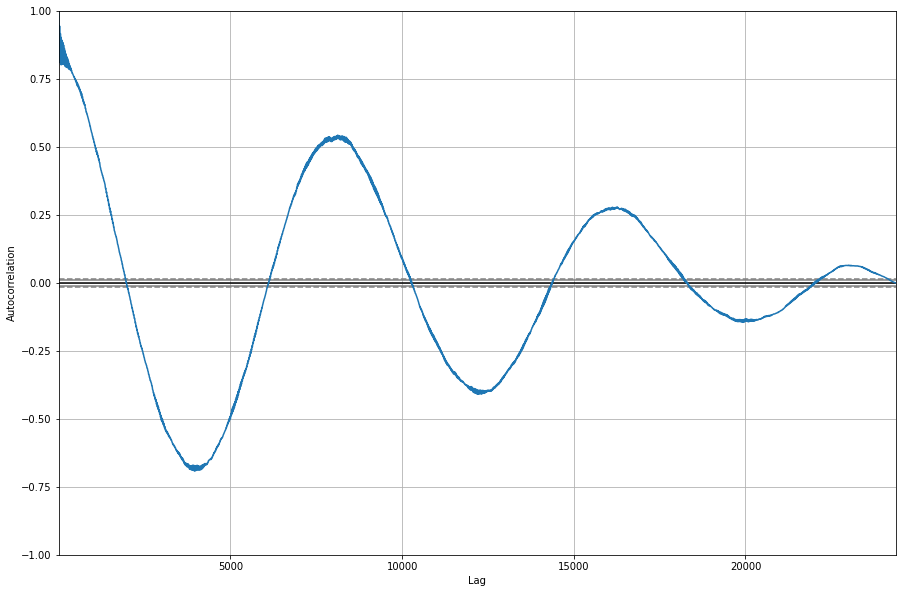

In [ ]:
autocorrelation_plot(aq_df_na['2014':'2016']['TEMP'])

In [ ]:
aq_df_na['TEMP'].resample('1m').mean()

year_month_day_hour
2013-03-31     6.039970
2013-04-30    12.208494
2013-05-31    21.886386
2013-06-30    23.752827
2013-07-31    27.405079
2013-08-31    27.228465
2013-09-30    20.482500
2013-10-31          NaN
2013-11-30     5.434524
2013-12-31     0.896623
2014-01-31     0.023428
2014-02-28    -0.352762
2014-03-31    10.415449
2014-04-30    17.235362
2014-05-31    22.043236
2014-06-30    25.194985
2014-07-31    28.409502
2014-08-31    26.284552
2014-09-30    20.834161
2014-10-31    13.556000
2014-11-30     6.357762
2014-12-31    -0.745582
2015-01-31    -0.590377
2015-02-28     1.572512
2015-03-31     8.707613
2015-04-30    15.566570
2015-05-31    21.300275
2015-06-30    24.636691
2015-07-31    26.228630
2015-08-31    26.135854
2015-09-30    20.392206
2015-10-31    14.387465
2015-11-30     3.358686
2015-12-31    -0.053912
2016-01-31    -4.233428
2016-02-29     1.434441
2016-03-31     8.687006
2016-04-30    16.262014
2016-05-31    20.793142
2016-06-30    25.481977
2016-07-31    25.839

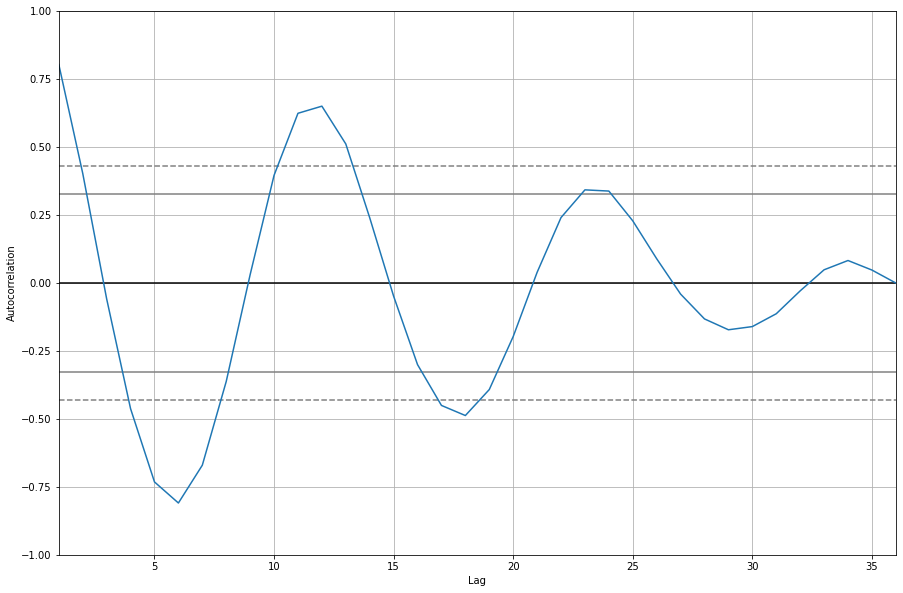

In [ ]:
autocorrelation_plot(aq_df_na['2014':'2016']['TEMP'].resample('1m').mean())